In [43]:
import torch
import time
from matplotlib import pyplot as plt
from utils.clocks.global_clock import clock, GLOBAL_TIME, GLOBAL_WAVE, GLOBAL_PULSE, GLOBAL_SPIKE
from utils.neurons.LIFNeurons.leaky_integrate_and_fire import LIFNeuron

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())


PyTorch version: 2.5.1
CUDA available: True
Number of GPUs: 1


In [44]:
class Synapse:
    def __init__(self, pre_neuron, post_neuron, weight=1.0):
        self.pre = pre_neuron
        self.post = post_neuron
        self.weight = weight

    def update(self):
        if self.pre.output.item() == 1:
            current = torch.tensor([self.weight], dtype=torch.float32, device=self.post.device)
            self.post.receive_input(current)


In [51]:


timer = clock(freq=2.0, sample_rate=100, amplitude=1.0)
neuron1 = LIFNeuron(v_rest=0.0, v_thresh=1.0, v_reset=0.0, tau=15.0, device=device)
neuron2 = LIFNeuron(v_rest=0.0, v_thresh=1.0, v_reset=0.0, tau=20.0, device=device)

syn = Synapse(pre_neuron=neuron1, post_neuron=neuron2, weight=1.5)

update_rate = 1000
spike_train = []
timestamp = []
neuron_v_1 = []
neuron_output_1 = []
neuron_v_2 = []
neuron_output_2 = []

timer.start()
time.sleep(1)
try:
    while True:
        spike = GLOBAL_SPIKE.clone()
        timestamp.append(GLOBAL_TIME.item())
        spike_train.append(spike.item())
        
        I = torch.tensor([5.0], device=device)
        
        neuron1.receive_input(I*spike)

        neuron1.update()
        neuron2.update()
        syn.update()
        
        neuron_v_1.append(neuron1.v.item())
        neuron_output_1.append(neuron1.output.item())
        neuron_v_2.append(neuron2.v.item())
        neuron_output_2.append(neuron2.output.item())

        if GLOBAL_TIME.item() > 6:
            break
        
        time.sleep(1/update_rate)

except Exception as e:
    print(e)

finally:
    timer.stop()

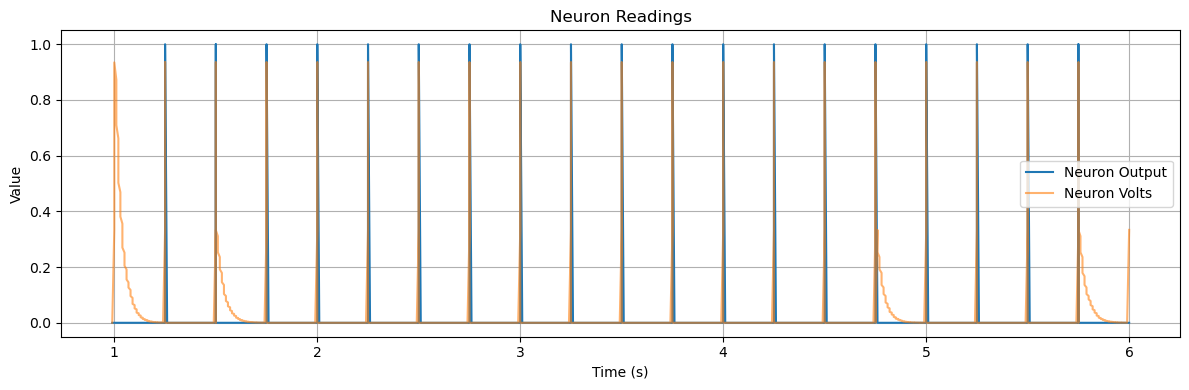

In [52]:
plt.figure(figsize=(12, 4))

# plt.plot(timestamp, spike_train, label='spikes')
plt.plot(timestamp, neuron_output_1, label='Neuron Output')
plt.plot(timestamp, neuron_v_1, label='Neuron Volts', alpha=0.6)

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Neuron Readings")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

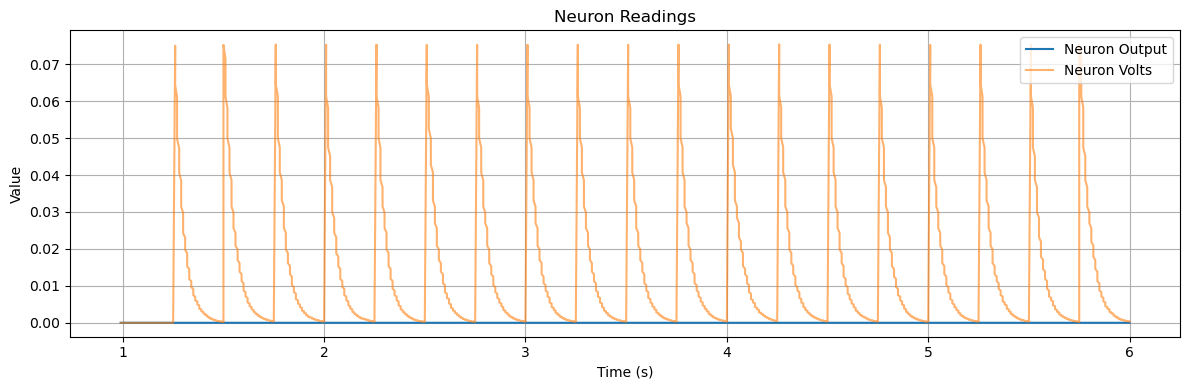

In [53]:
plt.figure(figsize=(12, 4))

# plt.plot(timestamp, spike_train, label='spikes')
plt.plot(timestamp, neuron_output_2, label='Neuron Output')
plt.plot(timestamp, neuron_v_2, label='Neuron Volts', alpha=0.6)

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Neuron Readings")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()